In [168]:
import pandas as pd

data = pd.read_csv('./archive (2)/data.csv')
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [169]:
print(data.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [243]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [244]:
numerical_cols = [col for col in data.columns if data[col].dtypes in ['int64','float64']]
categorical_cols = [col for col in data.columns if data[col].dtypes == 'object']
print('Numerical columns : ',numerical_cols)
print('Categorical columns : ',categorical_cols)

Numerical columns :  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
Categorical columns :  ['date', 'street', 'city', 'statezip', 'country']


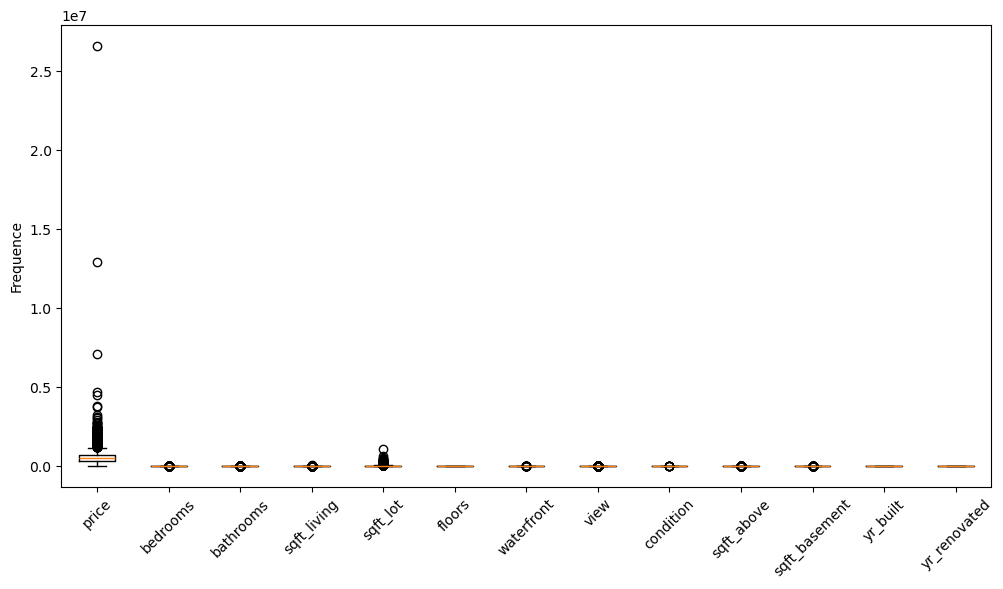

In [245]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.boxplot(data[numerical_cols],labels=numerical_cols)
plt.ylabel('Frequence')
plt.xticks(rotation=45)
plt.show()

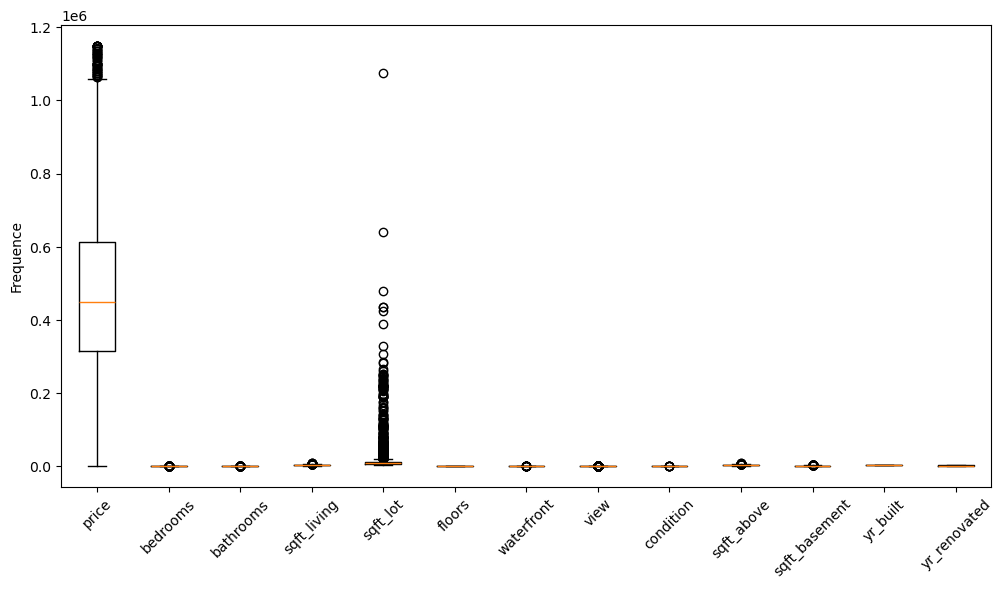

In [247]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

data_clean = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

plt.figure(figsize=(12,6))
plt.boxplot(data_clean[numerical_cols],labels=numerical_cols)
plt.ylabel('Frequence')
plt.xticks(rotation=45)
plt.show()

In [256]:
from sklearn.model_selection import train_test_split

X_full = data
y_full = data.price
X_full = X_full.drop(['price','date', 'street', 'city', 'country'],axis=1)

X_train,X_valid,y_train,y_valid = train_test_split(X_full,y_full,train_size=0.8,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)

(3680, 13) (3680,)
(920, 13) (920,)


In [259]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
OH_statezip_train = pd.DataFrame(OH_encoder.fit_transform(X_train[['statezip']]),index=X_train.index,columns=OH_encoder.get_feature_names_out(['statezip']))
OH_statezip_train.head()

,statezip_WA 98001,statezip_WA 98002,statezip_WA 98003,statezip_WA 98004,statezip_WA 98005,statezip_WA 98006,statezip_WA 98007,statezip_WA 98008,statezip_WA 98010,statezip_WA 98011,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
1144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
OH_statezip_valid = pd.DataFrame(OH_encoder.fit_transform(X_valid[['statezip']]),index=X_valid.index,columns=OH_encoder.get_feature_names_out(['statezip']))
OH_statezip_valid.head()

,statezip_WA 98001,statezip_WA 98002,statezip_WA 98003,statezip_WA 98004,statezip_WA 98005,statezip_WA 98006,statezip_WA 98007,statezip_WA 98008,statezip_WA 98011,statezip_WA 98014,...,statezip_WA 98148,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288
991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
X_train_clean = pd.concat([X_train,OH_statezip_train],axis=1)
X_valid_clean = pd.concat([X_valid,OH_statezip_valid],axis=1)
X_train_clean = X_train_clean.drop('statezip',axis=1)
X_valid_clean = X_valid_clean.drop('statezip',axis=1)
X_valid_clean = X_valid_clean.reindex(columns=X_train_clean.columns, fill_value=0)
X_train_clean.head()
X_valid_clean.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
991,3.0,2.5,2090,4700,2.0,0,0,3,2090,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2824,4.0,2.5,2640,8625,2.0,0,0,3,2640,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1906,1.0,1.0,650,15364,1.0,0,0,4,650,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1471,4.0,2.0,2510,38141,1.0,0,0,3,2510,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1813,4.0,3.5,2790,10125,1.5,0,0,5,2790,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [279]:
print(X_train_clean.shape,y_train.shape)
print(X_valid_clean.shape,y_valid.shape)

(3680, 89) (3680,)
(920, 89) (920,)


In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train_clean,y_train)

LinearRegression()

In [328]:
prediction = model.predict(X_valid_clean)
mae = mean_absolute_error(y_valid,prediction)
print('Mean Absolute Error : ',mae)
print('Moyenne : ',y_full.mean())
print('Ecaty-type : ',y_full.std())

Mean Absolute Error :  112539.0930176995
Moyenne :  551962.9884732141
Ecaty-type :  563834.7025471417


(3680, 89) (3680,)


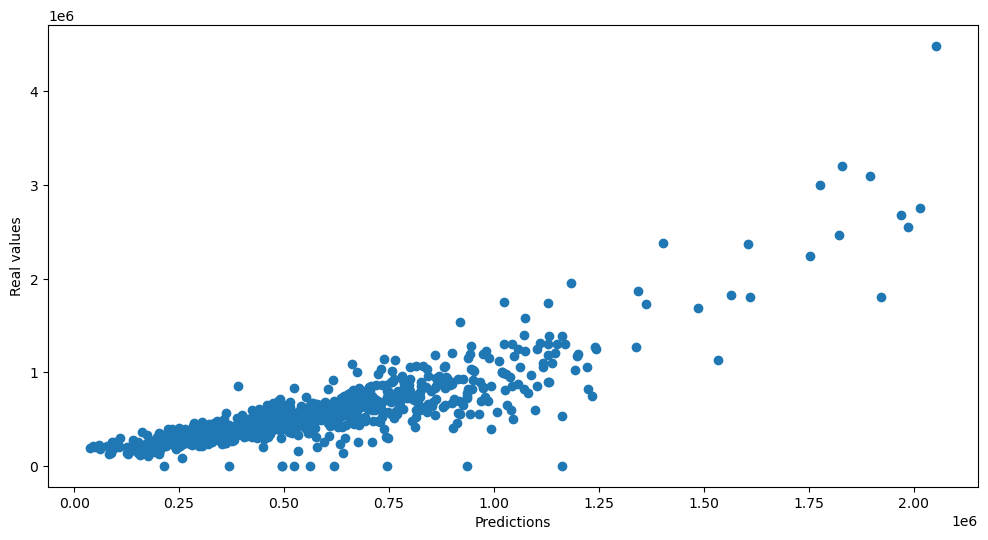

In [329]:
print(X_train_clean.shape,y_train.shape)

plt.figure(figsize=(12,6))
plt.scatter(prediction,y_valid)

plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()